# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

%matplotlib inline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
df = pd.read_csv("co2emissions_raw.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Menghapus Kolom Make karena tidak dibutuhkan dan tidak mempengaruhi target

In [5]:
df.drop(["Make", "Model"], axis=1, inplace=True)
df.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

####4.1 Deskripsi Variable

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle Class                     7385 non-null   object 
 1   Engine Size(L)                    7385 non-null   float64
 2   Cylinders                         7385 non-null   int64  
 3   Transmission                      7385 non-null   object 
 4   Fuel Type                         7385 non-null   object 
 5   Fuel Consumption City (L/100 km)  7385 non-null   float64
 6   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 9   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 577.1+ KB


In [7]:
print(df["Fuel Type"].unique())
print(len(df["Fuel Type"].unique()))

['Z' 'D' 'X' 'E' 'N']
5


Dataset ini terdiri dari 11 kolom dengan keterangan sebagai berikut:
- Make adalah Merek kendaraan
- Model adalah jenis sistem penggerak. Pada data terdapat 6 jenis sistem penggerak utama yaitu
  - 4WD/4X4 = Four-wheel drive
  - AWD = All-wheel drive
  - FFV = Flexible-fuel vehicle
  - SWB = Short wheelbase
  - LWB = Long wheelbase
  - EWB = Extended wheelbase
- Vehicle Class adalah kelas ukuran kendaraan. Terdapat 16 kelas yaitu
  - COMPACT
  - SUV - SMALL
  - MID-SIZE
  - TWO SEATER
  - MINICOMPACT
  - SUBCOMPACT
  - FULLSIZE
  - STATION WAGON-SMALL
  - SUV-STANDARD
  - VAN-CARGO
  - VAN-PASSENGER
  - PICKUP TRUCK-STANDARD
  - MINIVAN
  - SPECIAL PURPOSE VEHICLE
  - STATION WAGON-MID-SIZE
  - PICKUP TRUCK - SMALL
- Engine Size adalah adalah ukuran mesin dalam satuan liter (L)
- Cylinder adalah jumlah silinder pada kendaraan
- Transmission adalah jenis sistem transmisi kendaran. Terdapat 6 jenis utama yaitu
  - A = Automatic
  - AM = Automated Manual
  - AS = Automatic with Select Shift
  - AV = Continously Variable
  - M = Manual
- Fuel Type adalah jenis bahan bakar. Terdapat 5 jenis yaitu
  - X = Regular Gasoline
  - Z = Premium Gasoline
  - D = Diesel
  - E = Ethanol (E85)
  - N = Natural Gas
- Fuel Consumption City = Konsumsi bahan bakar di jalanan kota (L/100 km)
- Fuel Consumption Hwy = Konsumsi bahan bakar di jalan tol (L/100 km)
- Fuel Consumption Comb = Konsumsi bahan bakar gabungan (55% city, 45% highway) dalam satuan L/100 km
- Fuel Consumption Comb mpg = Konsumsi bahan bakar gabungan di jalan kota dan jalan tol dalam satuan mile per gallon(mpg)
- CO2 Emissions(g/km) adalah emisi karbon dioksida yang dihasilkan

###4.2 Statistik Deskriptif

Melihat statistik deskriptif pada data

In [8]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [9]:
print(df.describe().to_markdown())

|       |   Engine Size(L) |   Cylinders |   Fuel Consumption City (L/100 km) |   Fuel Consumption Hwy (L/100 km) |   Fuel Consumption Comb (L/100 km) |   Fuel Consumption Comb (mpg) |   CO2 Emissions(g/km) |
|:------|-----------------:|------------:|-----------------------------------:|----------------------------------:|-----------------------------------:|------------------------------:|----------------------:|
| count |       7385       |  7385       |                         7385       |                        7385       |                         7385       |                    7385       |             7385      |
| mean  |          3.16007 |     5.61503 |                           12.5565  |                           9.04171 |                           10.9751  |                      27.4817  |              250.585  |
| std   |          1.35417 |     1.82831 |                            3.50027 |                           2.22446 |                            2.89251 |            

Statistik deskriptif menunjukkan
1. count: Jumlah sampel data
2. mean: Nilai rerata
3. std: Standar deviasi
4. min: Nilai minimum
5. 25%: Kuartil bawah atau Q1
6. 50%: Kuartil tengah atau Q2 (median)
7. 75%: Kuartil atas atau Q3
8. max: Nilai maksimum

###4.3 Explorasi Missing Value

In [10]:
df.isnull().sum()

,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0
Fuel Consumption Comb (mpg),0
CO2 Emissions(g/km),0


In [11]:
print(df.isnull().sum().to_markdown())

|                                  |   0 |
|:---------------------------------|----:|
| Vehicle Class                    |   0 |
| Engine Size(L)                   |   0 |
| Cylinders                        |   0 |
| Transmission                     |   0 |
| Fuel Type                        |   0 |
| Fuel Consumption City (L/100 km) |   0 |
| Fuel Consumption Hwy (L/100 km)  |   0 |
| Fuel Consumption Comb (L/100 km) |   0 |
| Fuel Consumption Comb (mpg)      |   0 |
| CO2 Emissions(g/km)              |   0 |


Dari hasil tersebut, dapat disimpulkan bahwa pada dataset ini tidak terdapat missing value

###4.4 Explorasi Outlier

Memeriksa outlier pada data

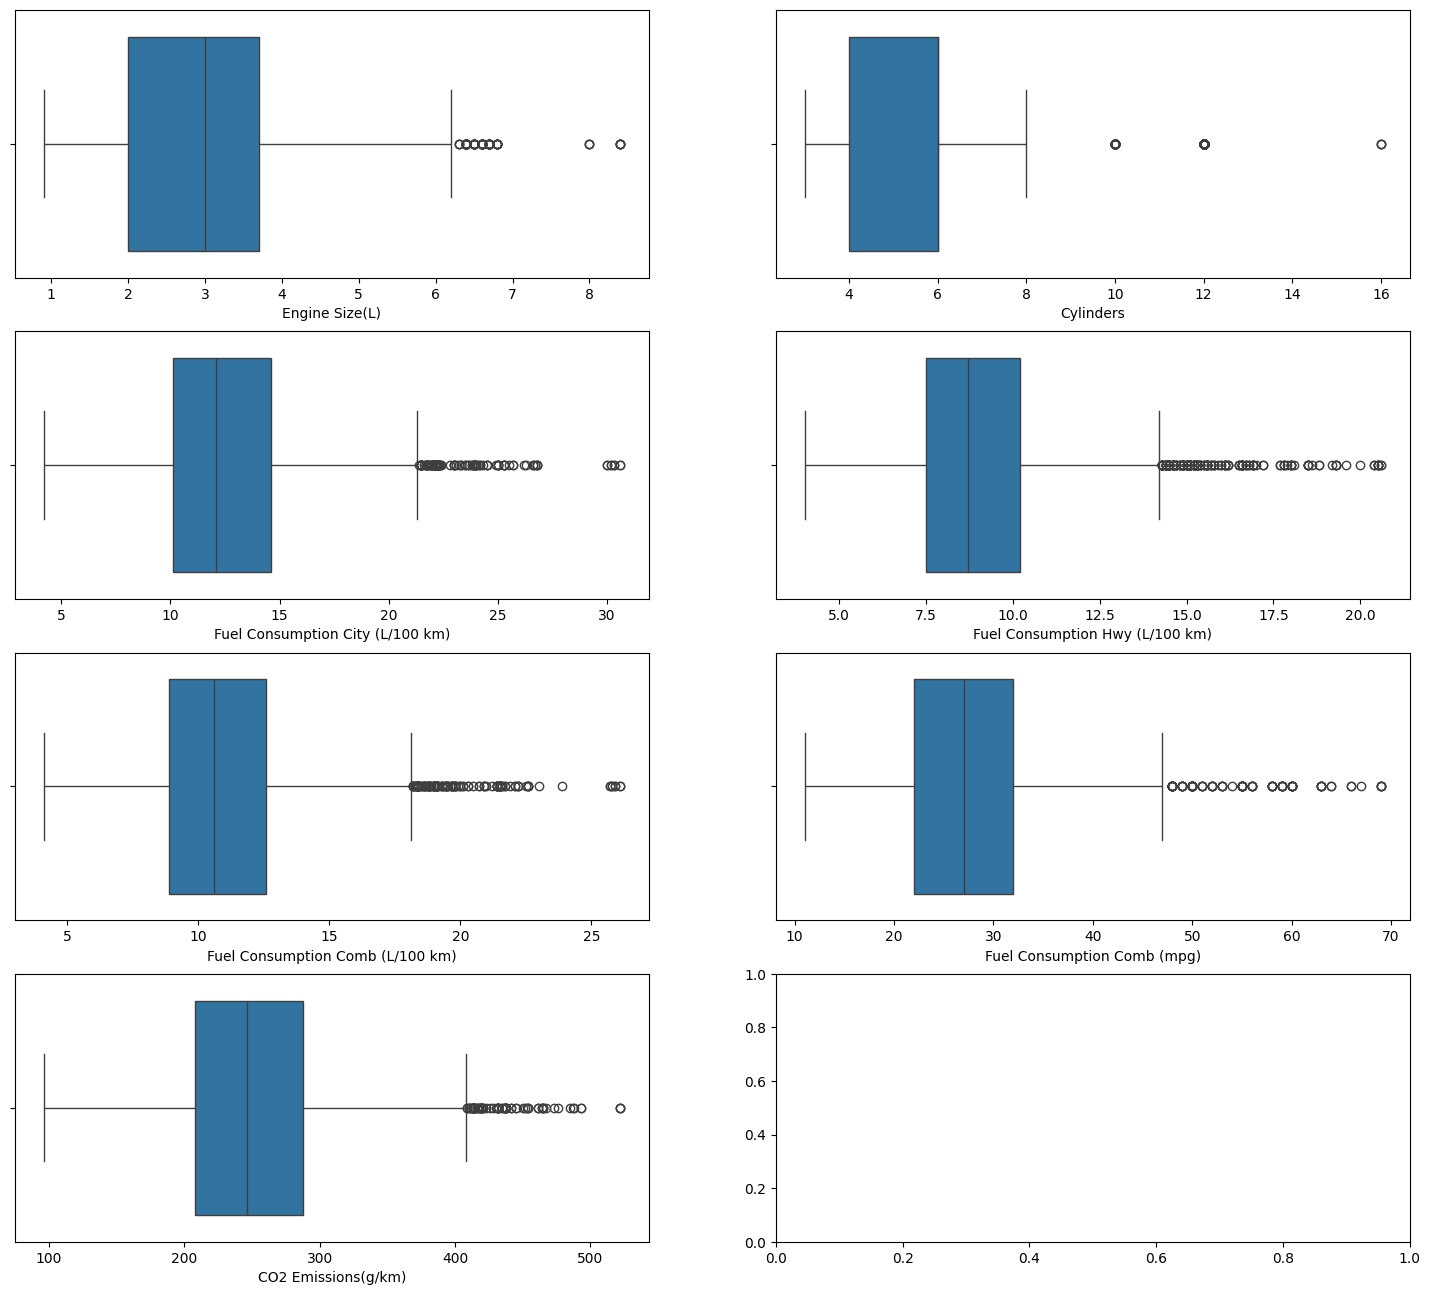

In [12]:
fig, ax = plt.subplots(4, 2, figsize=(18, 16))

sns.boxplot(ax=ax[0, 0], x=df['Engine Size(L)'])
sns.boxplot(ax=ax[0, 1], x=df['Cylinders'])
sns.boxplot(ax=ax[1, 0], x=df['Fuel Consumption City (L/100 km)'])
sns.boxplot(ax=ax[1, 1], x=df['Fuel Consumption Hwy (L/100 km)'])
sns.boxplot(ax=ax[2, 0], x=df['Fuel Consumption Comb (L/100 km)'])
sns.boxplot(ax=ax[2, 1], x=df['Fuel Consumption Comb (mpg)'])
sns.boxplot(ax=ax[3, 0], x=df['CO2 Emissions(g/km)'])
plt.savefig('boxplot_outliers_before.png')

Berdasarkan Grafik Boxplot diatas, dapat dilihat bahwa semua kolom numerik memiliki outliers

Untuk itu perlu dilakukan penghapusan Outlier

Buat batas atas dan batas bawah value sebagai acuan penghapusan outlier dengan formula

IQR = Q3 - Q1
Batas Atas = Q3 + 1.5 * IQR
Batas Bawah = Q1 - 1.5 * IQR

In [13]:
#Proses menghilangkan outlier

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

left1, right1 = df.align(Q1 - 1.5 * IQR, axis=1, copy=False)
left2, right2 = df.align(Q3 + 1.5 * IQR, axis=1, copy=False)
left, right = (left1 < right1).align((left2 > right2), axis=1, copy=False)
df = df[~(left | right).any(axis=1)]

# Detail setelah dilakukan penghapusan data outlier
df.describe()


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000
mean,3.014474,5.393349,12.179153,8.800308,10.658922,27.735423,245.680926
std,1.207377,1.509086,2.799971,1.802917,2.317081,5.992403,49.728477
min,0.900000,3.000000,5.600000,4.500000,6.000000,16.000000,128.000000
25%,2.000000,4.000000,10.000000,7.500000,8.900000,23.000000,207.000000
50%,3.000000,6.000000,11.900000,8.600000,10.400000,27.000000,242.000000
75%,3.600000,6.000000,14.100000,9.900000,12.200000,32.000000,280.000000
max,6.200000,8.000000,21.300000,14.200000,18.100000,47.000000,407.000000


In [14]:
print(df.shape)

(6826, 10)


Hasil setelah outlier dihilangkan, terlihat outlier sudah banyak berkurang

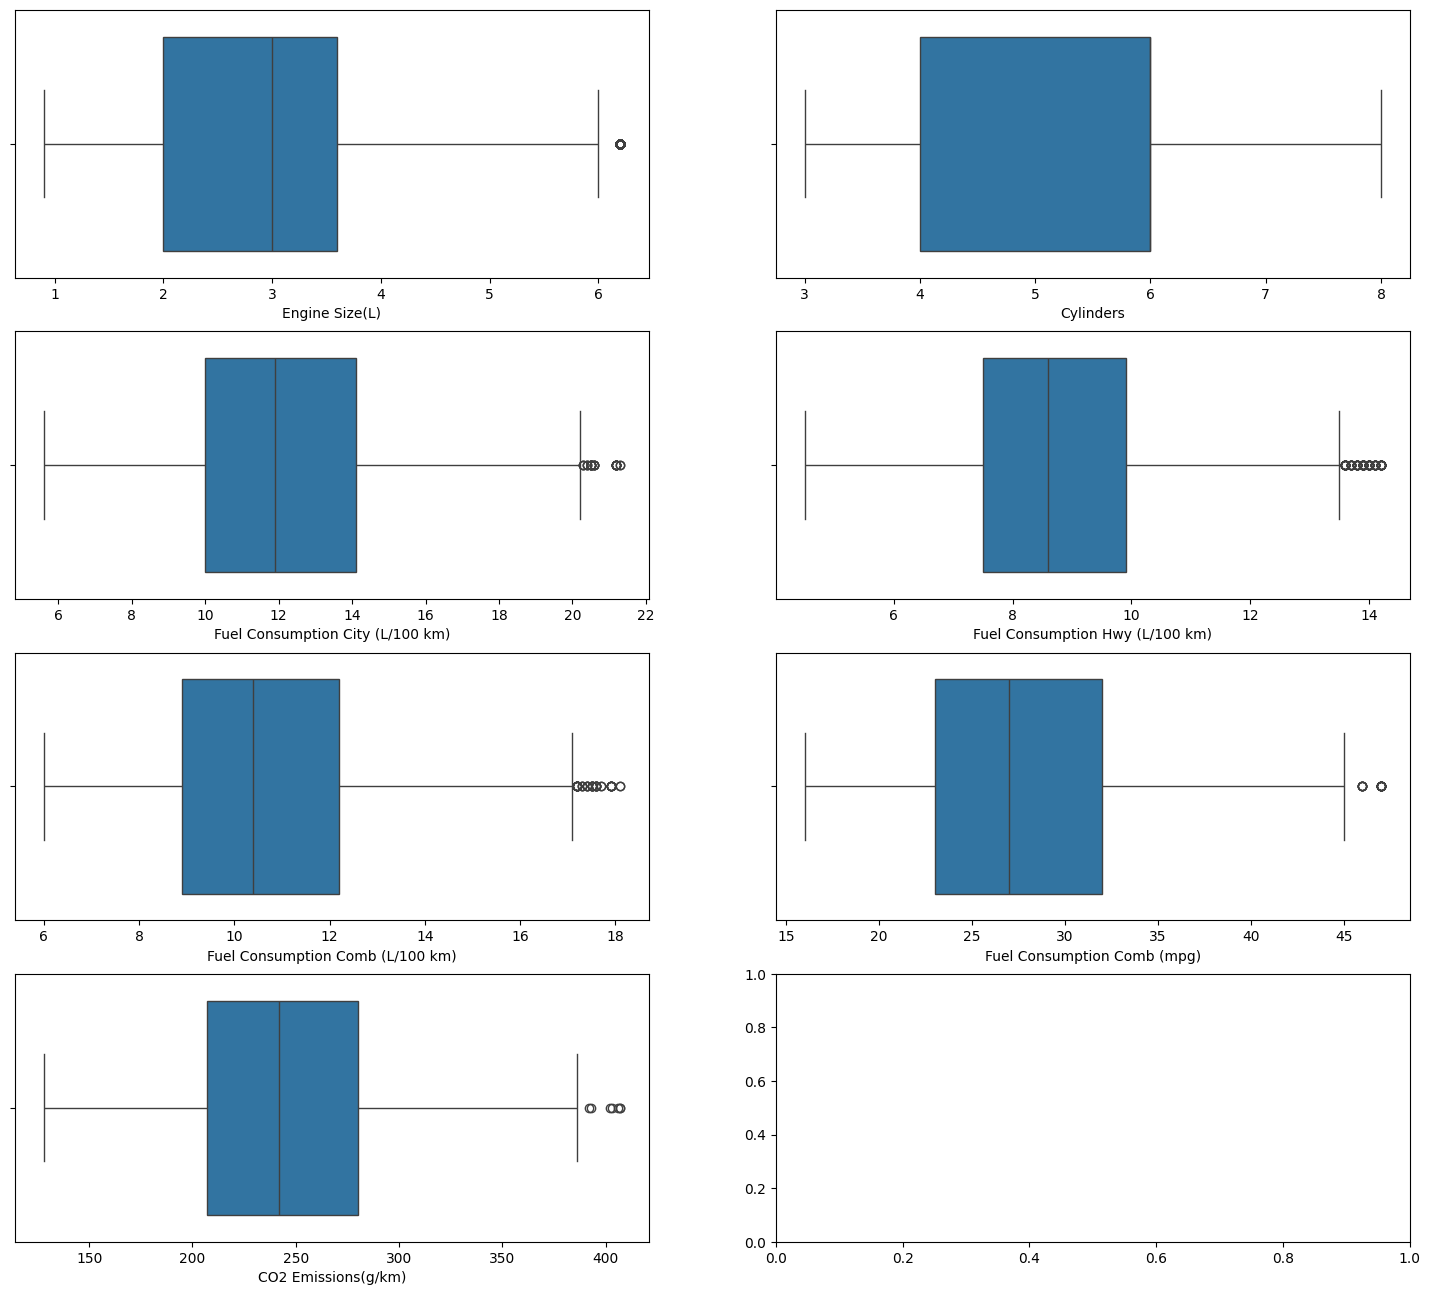

In [15]:
fig, ax = plt.subplots(4, 2, figsize=(18, 16))

sns.boxplot(ax=ax[0, 0], x=df['Engine Size(L)'])
sns.boxplot(ax=ax[0, 1], x=df['Cylinders'])
sns.boxplot(ax=ax[1, 0], x=df['Fuel Consumption City (L/100 km)'])
sns.boxplot(ax=ax[1, 1], x=df['Fuel Consumption Hwy (L/100 km)'])
sns.boxplot(ax=ax[2, 0], x=df['Fuel Consumption Comb (L/100 km)'])
sns.boxplot(ax=ax[2, 1], x=df['Fuel Consumption Comb (mpg)'])
sns.boxplot(ax=ax[3, 0], x=df['CO2 Emissions(g/km)'])
plt.savefig('boxplot_outliers_after.png')

###4.5 Univariate Analysis

Membagi feature numerik dan feature categorical

In [16]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
print('Numerical columns: ', num_cols)
print('Categorical columns: ', cat_cols)

num_features = num_cols.copy()
cat_features = cat_cols.copy()


num_features.remove('CO2 Emissions(g/km)')

Numerical columns:  ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
Categorical columns:  ['Vehicle Class', 'Transmission', 'Fuel Type']


####4.5.1 Menampilkan Visualisasi Data Kategorikal

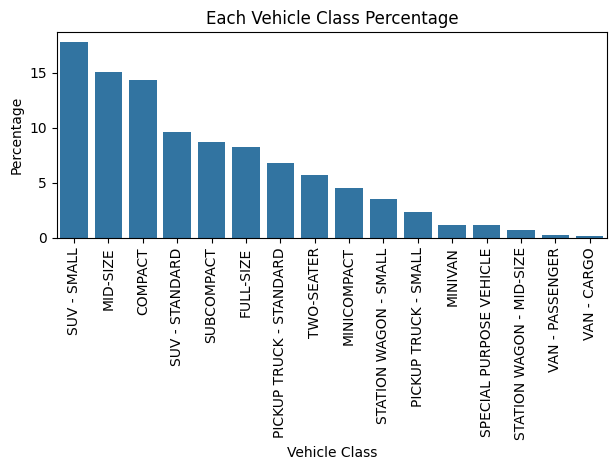

In [17]:
feature = cat_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)

plot = sns.barplot(x = percent.index, y = percent)
plt.title("Each Vehicle Class Percentage")
plt.xlabel("Vehicle Class")
plt.ylabel("Percentage")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig("barplot_vehicle_class.png")
plt.show()

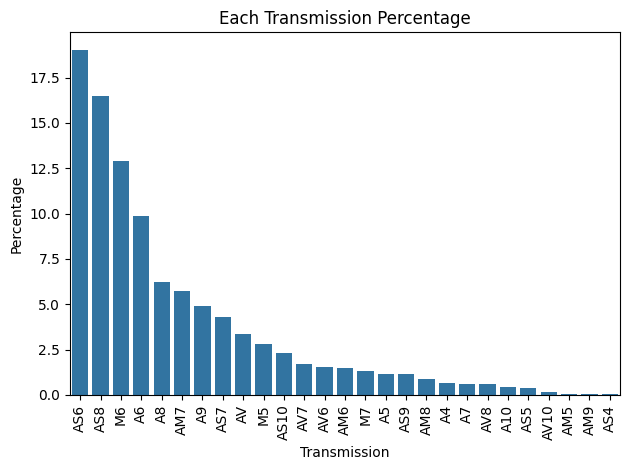

In [18]:
feature = cat_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)

plot = sns.barplot(x = percent.index, y = percent)
plt.title("Each Transmission Percentage")
plt.xlabel("Transmission")
plt.ylabel("Percentage")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig("barplot_transmission.png")
plt.show()

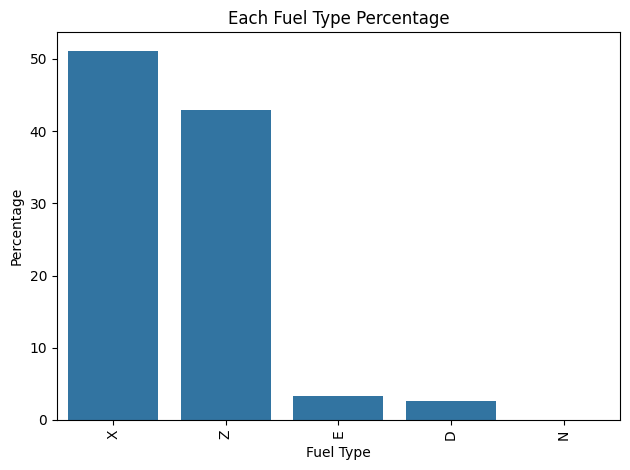

In [19]:
feature = cat_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)

plot = sns.barplot(x = percent.index, y = percent)
plt.title("Each Fuel Type Percentage")
plt.xlabel("Fuel Type")
plt.ylabel("Percentage")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig("barplot_fuel_type.png")
plt.show()

####4.5.2 Menampilkan Visualisasi Data Numerik

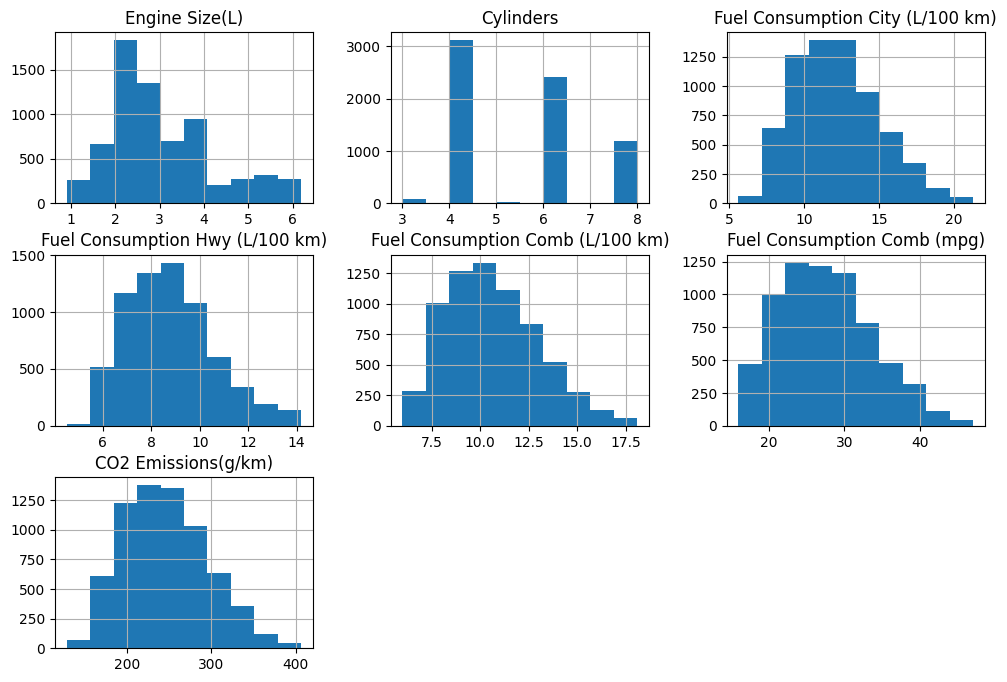

In [20]:
df.hist(figsize=(12, 8))
plt.savefig("histogram_numeric_feature")
plt.show()

Berdasarkan grafik histogram di atas, didapatkan distribusi data pada fitur numerik yaitu:
- `Engine`: Distribusi data normal.
- `Cylinders`: Distribusi data acak.
- `Fuel Consumption City (L/100Km)`: Distribusi data normal.
- `Fuel Consumption Hwy (L/100Km)`: Distribusi data normal.
- `Fuel Consumption Comb (L/100Km)`: Distribusi data Normal.
- `Fuel Consumption Comb (mpg)`: Distribusi data normal.
- `CO2 Emissions (g/km)`: Distribusi data normal.

###4.6 Multivariate Analysis

####4.6.1 Data Kategorikal

Mengecek rata-rata CO2 Emissions pada setiap kategori Vehicle Class, Transmission dan Fuel Type untuk mengetahui seberapa pengaruh fitur kategorikal terhadap target

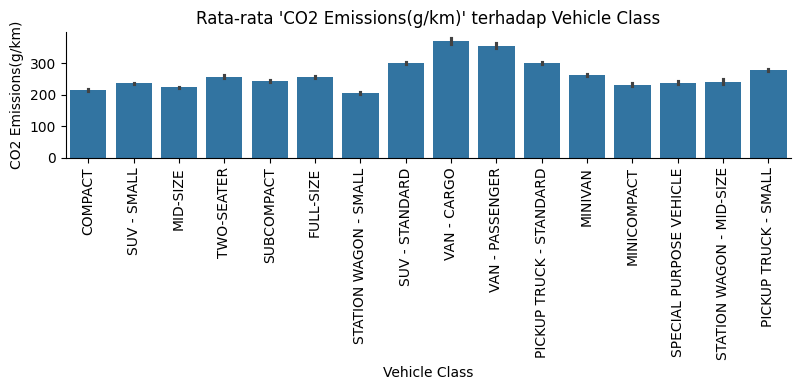

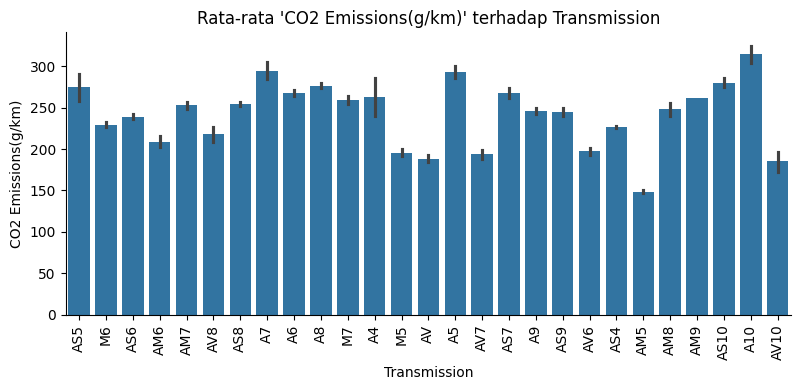

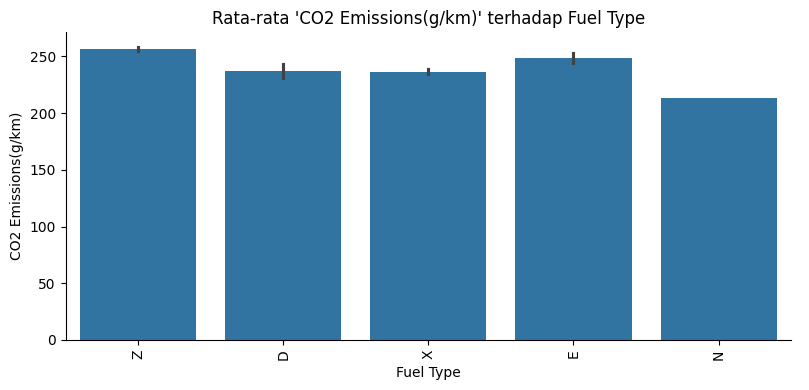

In [21]:
for col in cat_cols:
  plot = sns.catplot(x=col, y='CO2 Emissions(g/km)', data=df, kind='bar', height=4, aspect=2)
  plot.set_xticklabels(rotation=90)
  plt.title(f'Rata-rata \'CO2 Emissions(g/km)\' terhadap {col}')
  plt.tight_layout()
  plt.savefig(f'multivariate plot {col.lower()}.png')

Berdasarkan histogram di atas, diperoleh kesimpulan:
- Rata-rata `CO2 Emissions` terhadap `Fuel Type` memberikan sedikit pengaruh di mana rata-rata `CO2 Emissions` untuk `Fuel Type` cenderung sama rata.
- `Vehicle Class` memberikan sedikit pengaruh terhadap `CO2 Emissions` karena semakin besar kelas kendaraannya maka semakin tinggi `CO2 Emissions`
- `Transmission` memberikan sedikit pengaruh dengan pola fluktuatif terhadap `CO2 Emissions`

####4.6.2 Data Numerik

Mengecek rata-rata `CO2 Emissions` terhadap masing-masing fitur numerik yaitu `Engine Size(L)`, `Cylinders`, `Fuel Consumption City (L/100 km)`, `Fuel Consumption Hwy (L/100 km)`, `Fuel Consumption Comb (L/100 km)`, `Fuel Consumption Comb (mpg)`, `CO2 Emissions(g/km)`

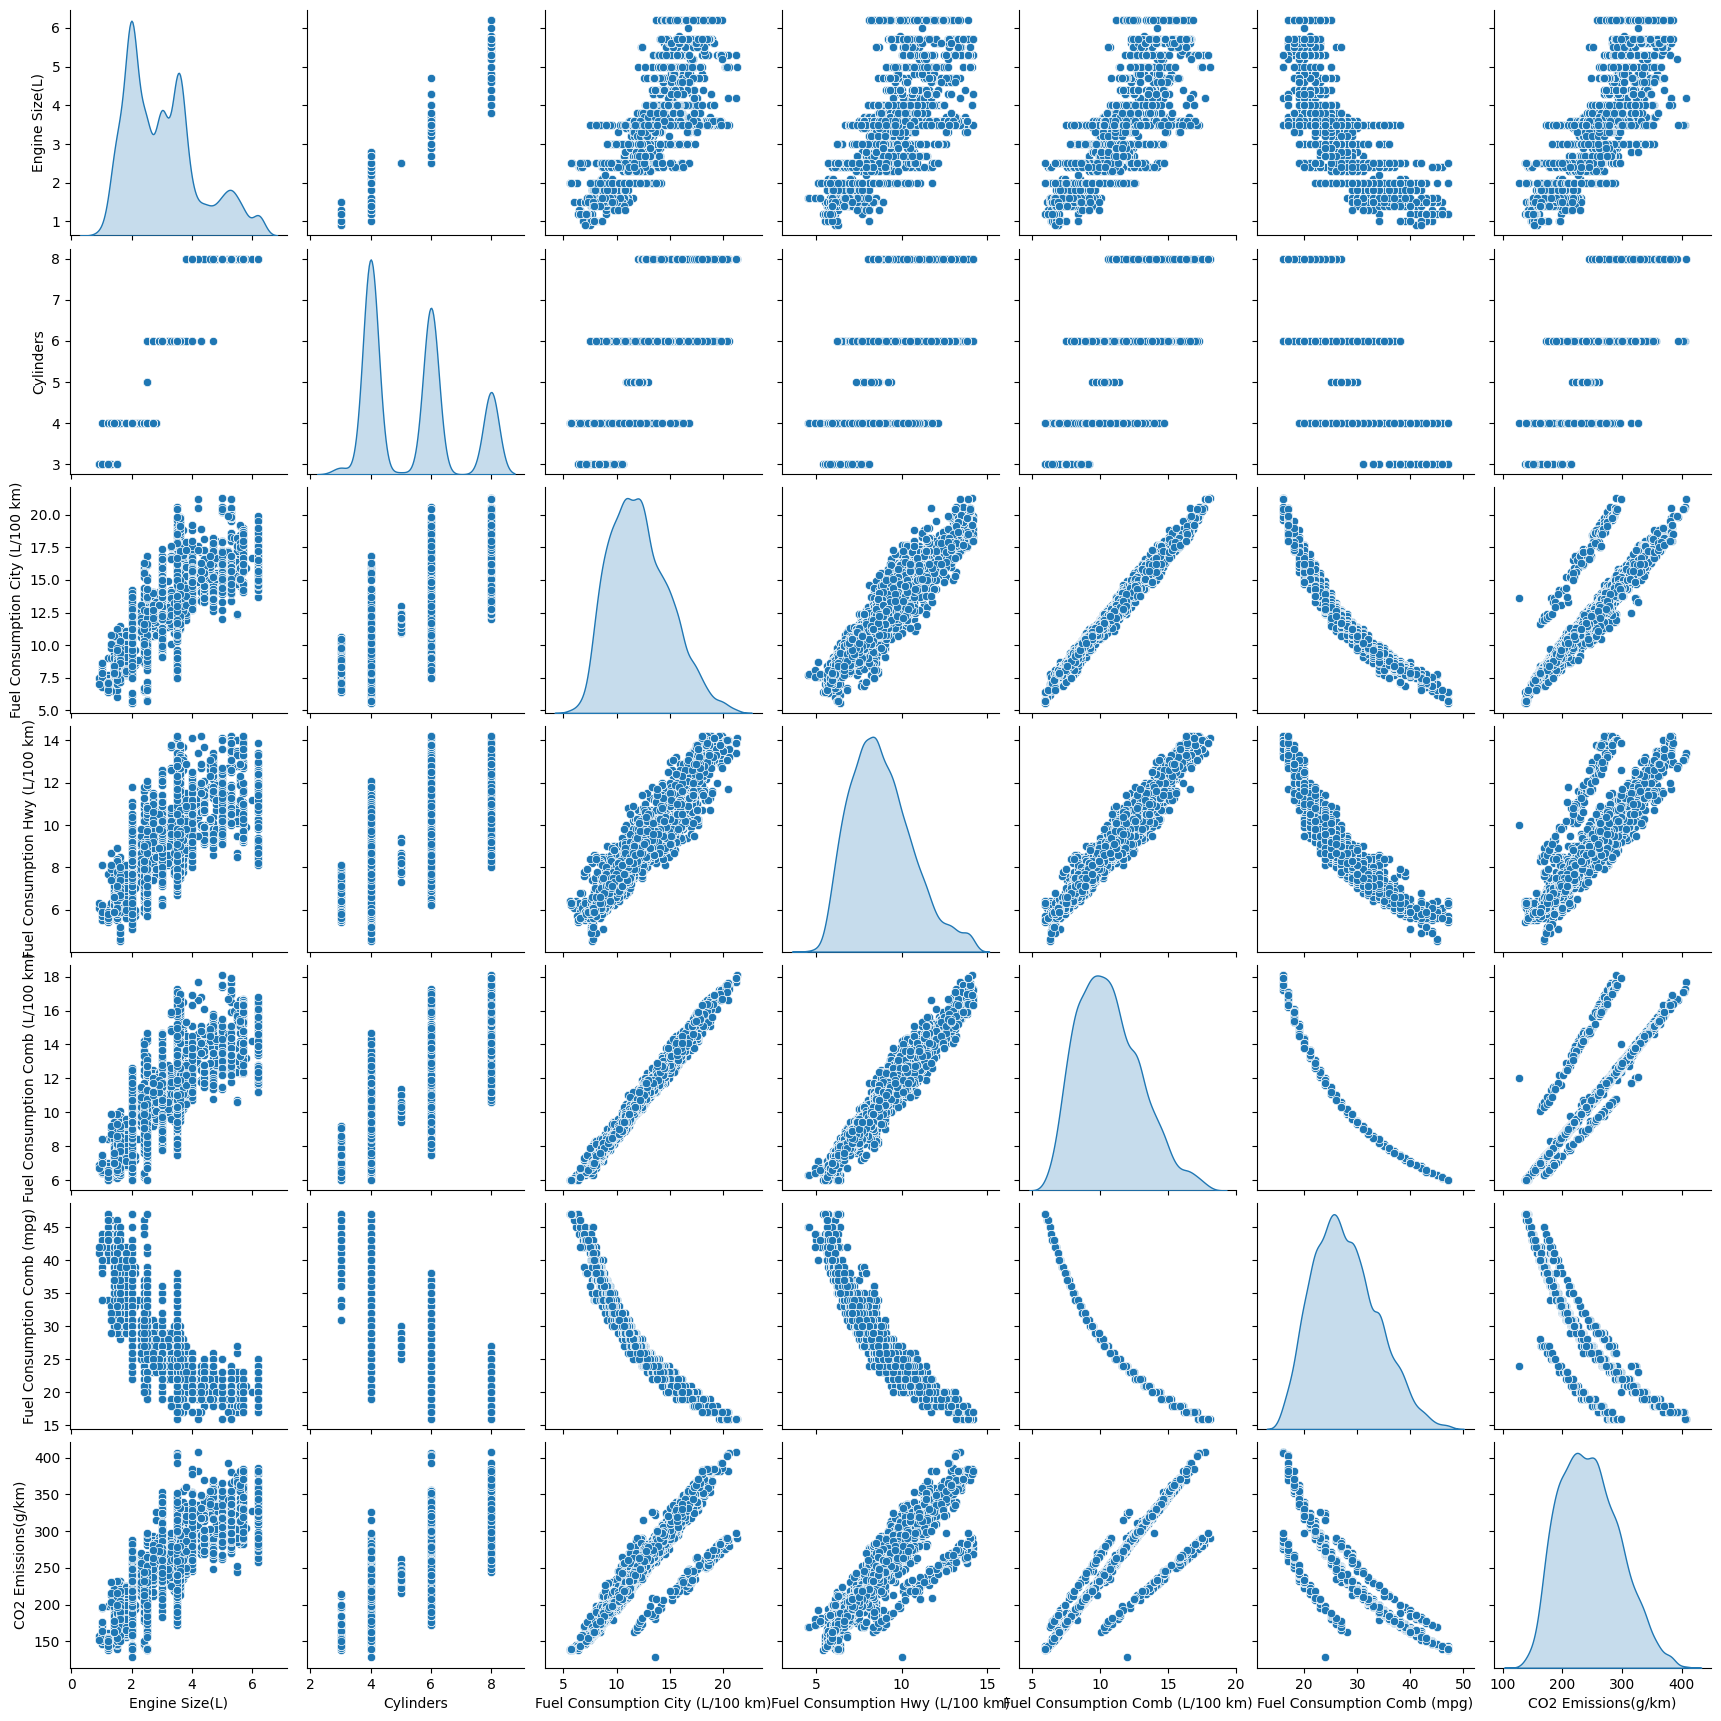

In [22]:
sns.pairplot(df, diag_kind='kde')
plt.savefig("pairplot_numerical_feature.png")

###4.7 Correlation Matrix

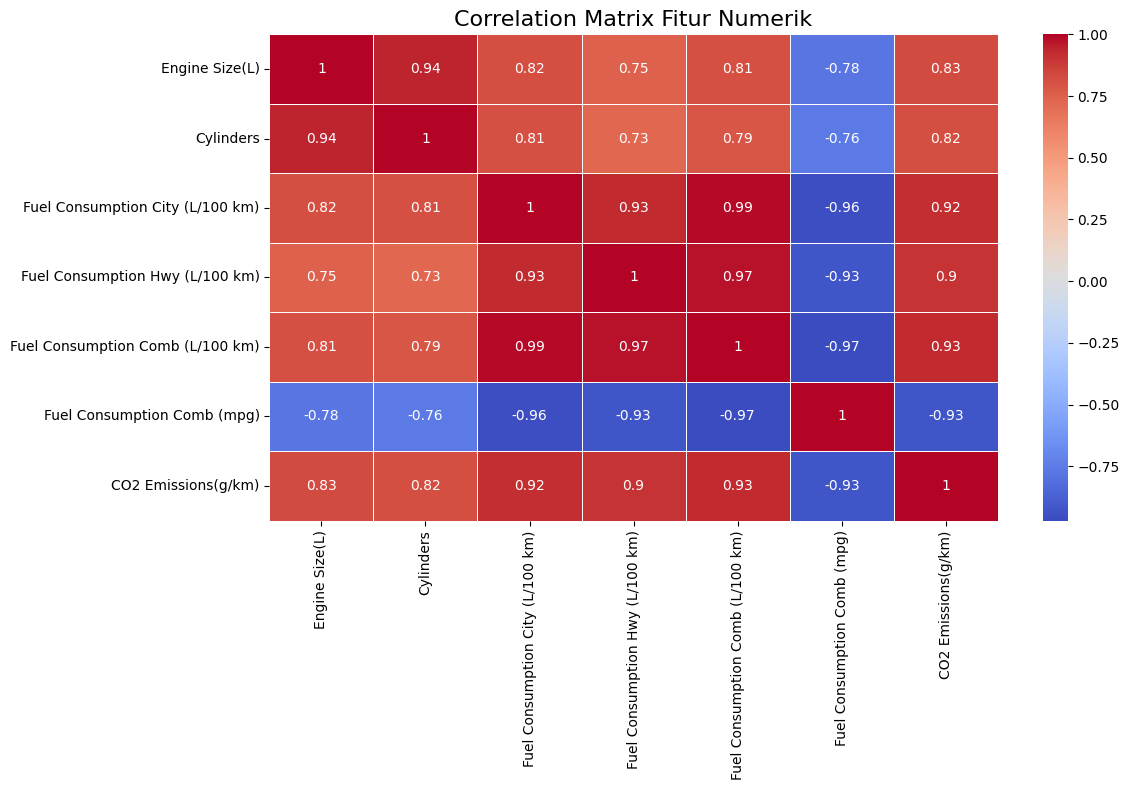

In [23]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True).round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Fitur Numerik', size=16)
plt.tight_layout()
plt.savefig("heatmap_numeric_feature.png")

Berdasarkan diagram heatmap di atas, dapat disimpulkan bahwa:
- Rentang nilai adalah 0 sampai 1.
- Semakin mendekati 1, semakin kuat positif korelasi antar variabel.
- Semakin mendekati 0, semakin rendah atau tidak ada korelasi antar variabel.
- Semakin mendekati -1, semakin kuat negatif korelasi antar variabel.
- Korelasi antar fitur numerik yang memiliki korelasi kuat positif adalah `CO2 Emission` terhadap `Engine Size`, `Cylinders`, `Fuel Consumption City`, `Fuel Consumption Hwy`, `Fuel Consumption Comb (L/100km)`
- Korelasi antar fitur numerik yang memiliki korelasi kuat negatif adalah `Fuel Consumption Com (mpg)`

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

###5.1 Encoding Fitur Kategorikal

Melakukan proses encoding pada fitur kategori `Vehicle Class`, `Transmission`, `Fuel Type`

In [24]:
df = pd.concat([df, pd.get_dummies(df['Vehicle Class'], prefix='Vehicle Class')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Transmission'], prefix='Transmission')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Fuel Type'], prefix='Fuel Type')], axis=1)
df.drop(['Vehicle Class', 'Transmission', 'Fuel Type'], axis=1, inplace=True)
df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.4,4,11.2,7.7,9.6,29,221,True,False,False,...,False,False,False,True,False,False,False,False,False,True
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,3.5,6,11.9,7.7,10.0,28,230,False,False,True,...,False,False,False,False,False,False,False,False,False,True


###5.2 Membagi / Split Dataset

Membagi dataset menjadi data latih dan data validasi kemudian menampilkan total dataset, total data latih dan total data validasi.


In [25]:
df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.4,4,11.2,7.7,9.6,29,221,True,False,False,...,False,False,False,True,False,False,False,False,False,True
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,3.5,6,11.9,7.7,10.0,28,230,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [26]:
X = df.drop(['CO2 Emissions(g/km)'], axis=1)
y = df['CO2 Emissions(g/km)']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=90)

In [27]:
print(f'Total sample in whole dataset: {len(X_train) + len(X_val)}')
print(f'Total sample in train dataset: {len(X_train)}')
print(f'Total sample in val dataset: {len(X_val)}')

Total sample in whole dataset: 6826
Total sample in train dataset: 6143
Total sample in val dataset: 683


###5.3 Standarisasi

Melakukan standarisasi pada fitur numerik yaitu menggunakan StandardScaler untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma.

In [28]:
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train.loc[:, num_features])
X_train[num_features].head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
6375,0.811898,1.724128,0.436988,0.723162,0.536907,-0.622999
4499,-0.014461,0.401536,-0.170921,-0.111057,-0.154725,-0.122705
3451,0.481354,0.401536,1.366730,1.168079,1.314993,-1.123293
5119,0.811898,1.724128,0.651544,0.890006,0.753042,-0.789764
712,-0.840820,-0.921056,-1.494015,-1.612652,-1.537988,2.045236


In [29]:
X_train[num_features].describe().round(3)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
count,6143.000,6143.000,6143.000,6143.000,6143.000,6143.000
mean,-0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.750,-1.582,-2.352,-2.391,-2.013,-1.957
25%,-0.841,-0.921,-0.779,-0.723,-0.760,-0.790
50%,-0.014,0.402,-0.099,-0.111,-0.111,-0.123
75%,0.481,0.402,0.687,0.612,0.667,0.711
max,2.630,1.724,3.262,3.003,3.217,3.213


###5.4 Export Dataset

In [35]:
train_processed = pd.DataFrame(X_train)
train_processed['target'] = y_train

val_processed = pd.DataFrame(X_val)
val_processed['target'] = y_val

os.makedirs("co2emissions_preprocessing", exist_ok=True)
train_processed.to_csv("co2emissions_preprocessing/train_processed.csv", index=False)
val_processed.to_csv("co2emissions_preprocessing/val_processed.csv", index=False)